In [1]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dmkd/24. Mushrooms.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 8124 rows and 23 columns.


In [4]:
# view dimensions of dataset

df.shape

(8124, 23)

In [5]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
col_names = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                     'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                     'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                     'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                     'spore-print-color', 'population', 'habitat']


for col in col_names:
    print(df[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

# **Dataset Preprocessing**

We need to transform all categorical data to numerical ones. That's why we are applying some catoegory_encoder in our dataset.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# Replace the column names with your actual column names

columns_to_encode = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                     'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                     'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                     'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                     'spore-print-color', 'population', 'habitat']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Now, 'df' contains the numeric representation of the categorical values in the specified columns


In [9]:
# Normalize using Min/Max Normalization.
normalized_df=(df-df.min())/(df.max()-df.min())
print(normalized_df)

      class  cap-shape  cap-surface  cap-color  bruises   odor  \
0       1.0        1.0     0.666667   0.444444      1.0  0.750   
1       0.0        1.0     0.666667   1.000000      1.0  0.000   
2       0.0        0.0     0.666667   0.888889      1.0  0.375   
3       1.0        1.0     1.000000   0.888889      1.0  0.750   
4       0.0        1.0     0.666667   0.333333      0.0  0.625   
...     ...        ...          ...        ...      ...    ...   
8119    0.0        0.6     0.666667   0.444444      0.0  0.625   
8120    0.0        1.0     0.666667   0.444444      0.0  0.625   
8121    0.0        0.4     0.666667   0.444444      0.0  0.625   
8122    1.0        0.6     1.000000   0.444444      0.0  1.000   
8123    0.0        1.0     0.666667   0.444444      0.0  0.625   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                 1.0           0.0        1.0    0.363636  ...   
1                 1.0           0.0        0.0    0.363636  ...   
2     

In [10]:
# check missing values in variables

normalized_df.isnull().sum()
normalized_df = normalized_df.drop(columns=['veil-type'])

In [11]:
normalized_df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667
5,0.0,1.0,1.000000,1.000000,1.0,0.000,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.4,0.166667
6,0.0,0.0,0.666667,0.888889,1.0,0.000,1.0,0.0,0.0,0.181818,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.4,0.500000
7,0.0,0.0,1.000000,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.6,0.500000
8,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.636364,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.8,0.166667
9,0.0,0.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.181818,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.500000


# **Preparing dataset to be fed into Model**

The target/response variable in our dataset is **class**. So we are putting the class labels in our target varible $y$.

The other varaibles/predictors are the columns **[buying, maint, doors, persons, lug_boot, safety]** and should be put in our training variable $X$.

In [12]:
X = normalized_df.drop(['class'], axis=1)

y = normalized_df['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5443, 21)
(5443,)
(2681, 21)
(2681,)


In [15]:
X_train.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3244,0.4,0.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.666667,0.750,0.375,0.666667,0.5,1.0,0.250,1.0,0.000000
3739,1.0,0.000000,0.333333,0.0,0.125,1.0,1.0,1.0,0.636364,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.8,0.000000
2154,1.0,0.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.666667,0.875,0.375,0.666667,0.5,1.0,0.375,1.0,0.000000
1344,0.4,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.454545,1.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.6,0.166667
7852,0.6,1.000000,0.444444,0.0,0.875,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.333333,0.875,0.875,0.666667,0.5,0.0,0.875,0.8,0.333333
6104,0.4,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.333333,0.875,0.875,0.666667,0.5,0.0,0.875,0.8,0.000000
4829,0.4,1.000000,1.000000,0.0,0.250,1.0,0.0,0.0,0.272727,0.0,...,0.333333,0.333333,0.750,0.750,0.666667,0.5,0.5,0.125,0.8,0.000000
952,0.4,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.272727,1.0,...,0.666667,0.000000,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667
6964,1.0,1.000000,0.222222,0.0,0.875,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.666667,0.750,0.750,0.666667,0.5,0.0,0.875,0.8,0.333333
1504,0.4,0.000000,0.888889,0.0,0.625,1.0,1.0,0.0,0.454545,1.0,...,0.000000,0.000000,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


# **Decision Tree - CART**

We will now build our model of Decision Tree Classifier.

Theclassification and regression trees(CART) method was suggested by Breimanet al.  [1] in 1984.  The decision trees produced by CART are strictly binary,containing exactly two branches for each decision node. CART recursively par-titions the records in the training data set into subsets of records with similarvalues for the target attribute.  The CART algorithm grows the tree by conduct-ing for each decision node, an exhaustive search of all available variables and allpossible splitting values, selecting the optimal split according to the followingcriteria (from Kennedy et al. [2]).

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

## **Measures for selecting the Best Split**

The measures developed for selecting the best split are often based on the degree of impurity of the child nodes. The smaller the degree of impurity, the more skewed the class distribution. For example, a node with class distribution (0,1) has zero impurity wheres a node with uniform class distribution has the highest impurity. Examples of impurity measures include:
   
* Entropy($t$) = $-\sum_{i=0}^{c-1}{p(i|t)\log_{2}p(i|t)}$

* Gini($t$) = $1-\sum_{i=0}^{c-1}{[p(i|t)]^2}$

* Classification Error($t$) = $1-\max_{i}[p(i|t)]$

where, $c$ is the number of classes and $0\log_{2}0=0$ in entropy calculations.

In [16]:
# Find more about scikit-learn's implementation of decision trees here - https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier

In [17]:
# setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
clf_gini = DecisionTreeClassifier(max_depth=6, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [18]:
# Getting some predictions from the testing set
y_pred_gini = clf_gini.predict(X_test)

y_pred_gini

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
# Finding the testing accuracy of the model
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Test accuracy score with criterion gini index: 0.9996


In [20]:
# Finding the training accuracy of the model
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0., 1., 0., ..., 0., 1., 0.])

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9987


In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9987
Test set score: 0.9996


[Text(0.43478260869565216, 0.9285714285714286, 'x[8] <= 0.318\ngini = 0.499\nsamples = 5443\nvalue = [2830, 2613]'),
 Text(0.21739130434782608, 0.7857142857142857, 'x[19] <= 0.7\ngini = 0.277\nsamples = 2214\nvalue = [368, 1846]'),
 Text(0.08695652173913043, 0.6428571428571429, 'x[18] <= 0.188\ngini = 0.215\nsamples = 399\nvalue = [350, 49]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.13043478260869565, 0.5, 'x[20] <= 0.083\ngini = 0.093\nsamples = 368\nvalue = [350, 18]'),
 Text(0.08695652173913043, 0.35714285714285715, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.17391304347826086, 0.35714285714285715, 'gini = 0.0\nsamples = 350\nvalue = [350, 0]'),
 Text(0.34782608695652173, 0.6428571428571429, 'x[10] <= 0.5\ngini = 0.02\nsamples = 1815\nvalue = [18, 1797]'),
 Text(0.30434782608695654, 0.5, 'x[12] <= 0.167\ngini = 0.008\nsamples = 1804\nvalue = [7, 1797]'),
 Text(0.2608695652173913, 0.35714285714285715, 'x[17] <= 0.625\ngini = 0.

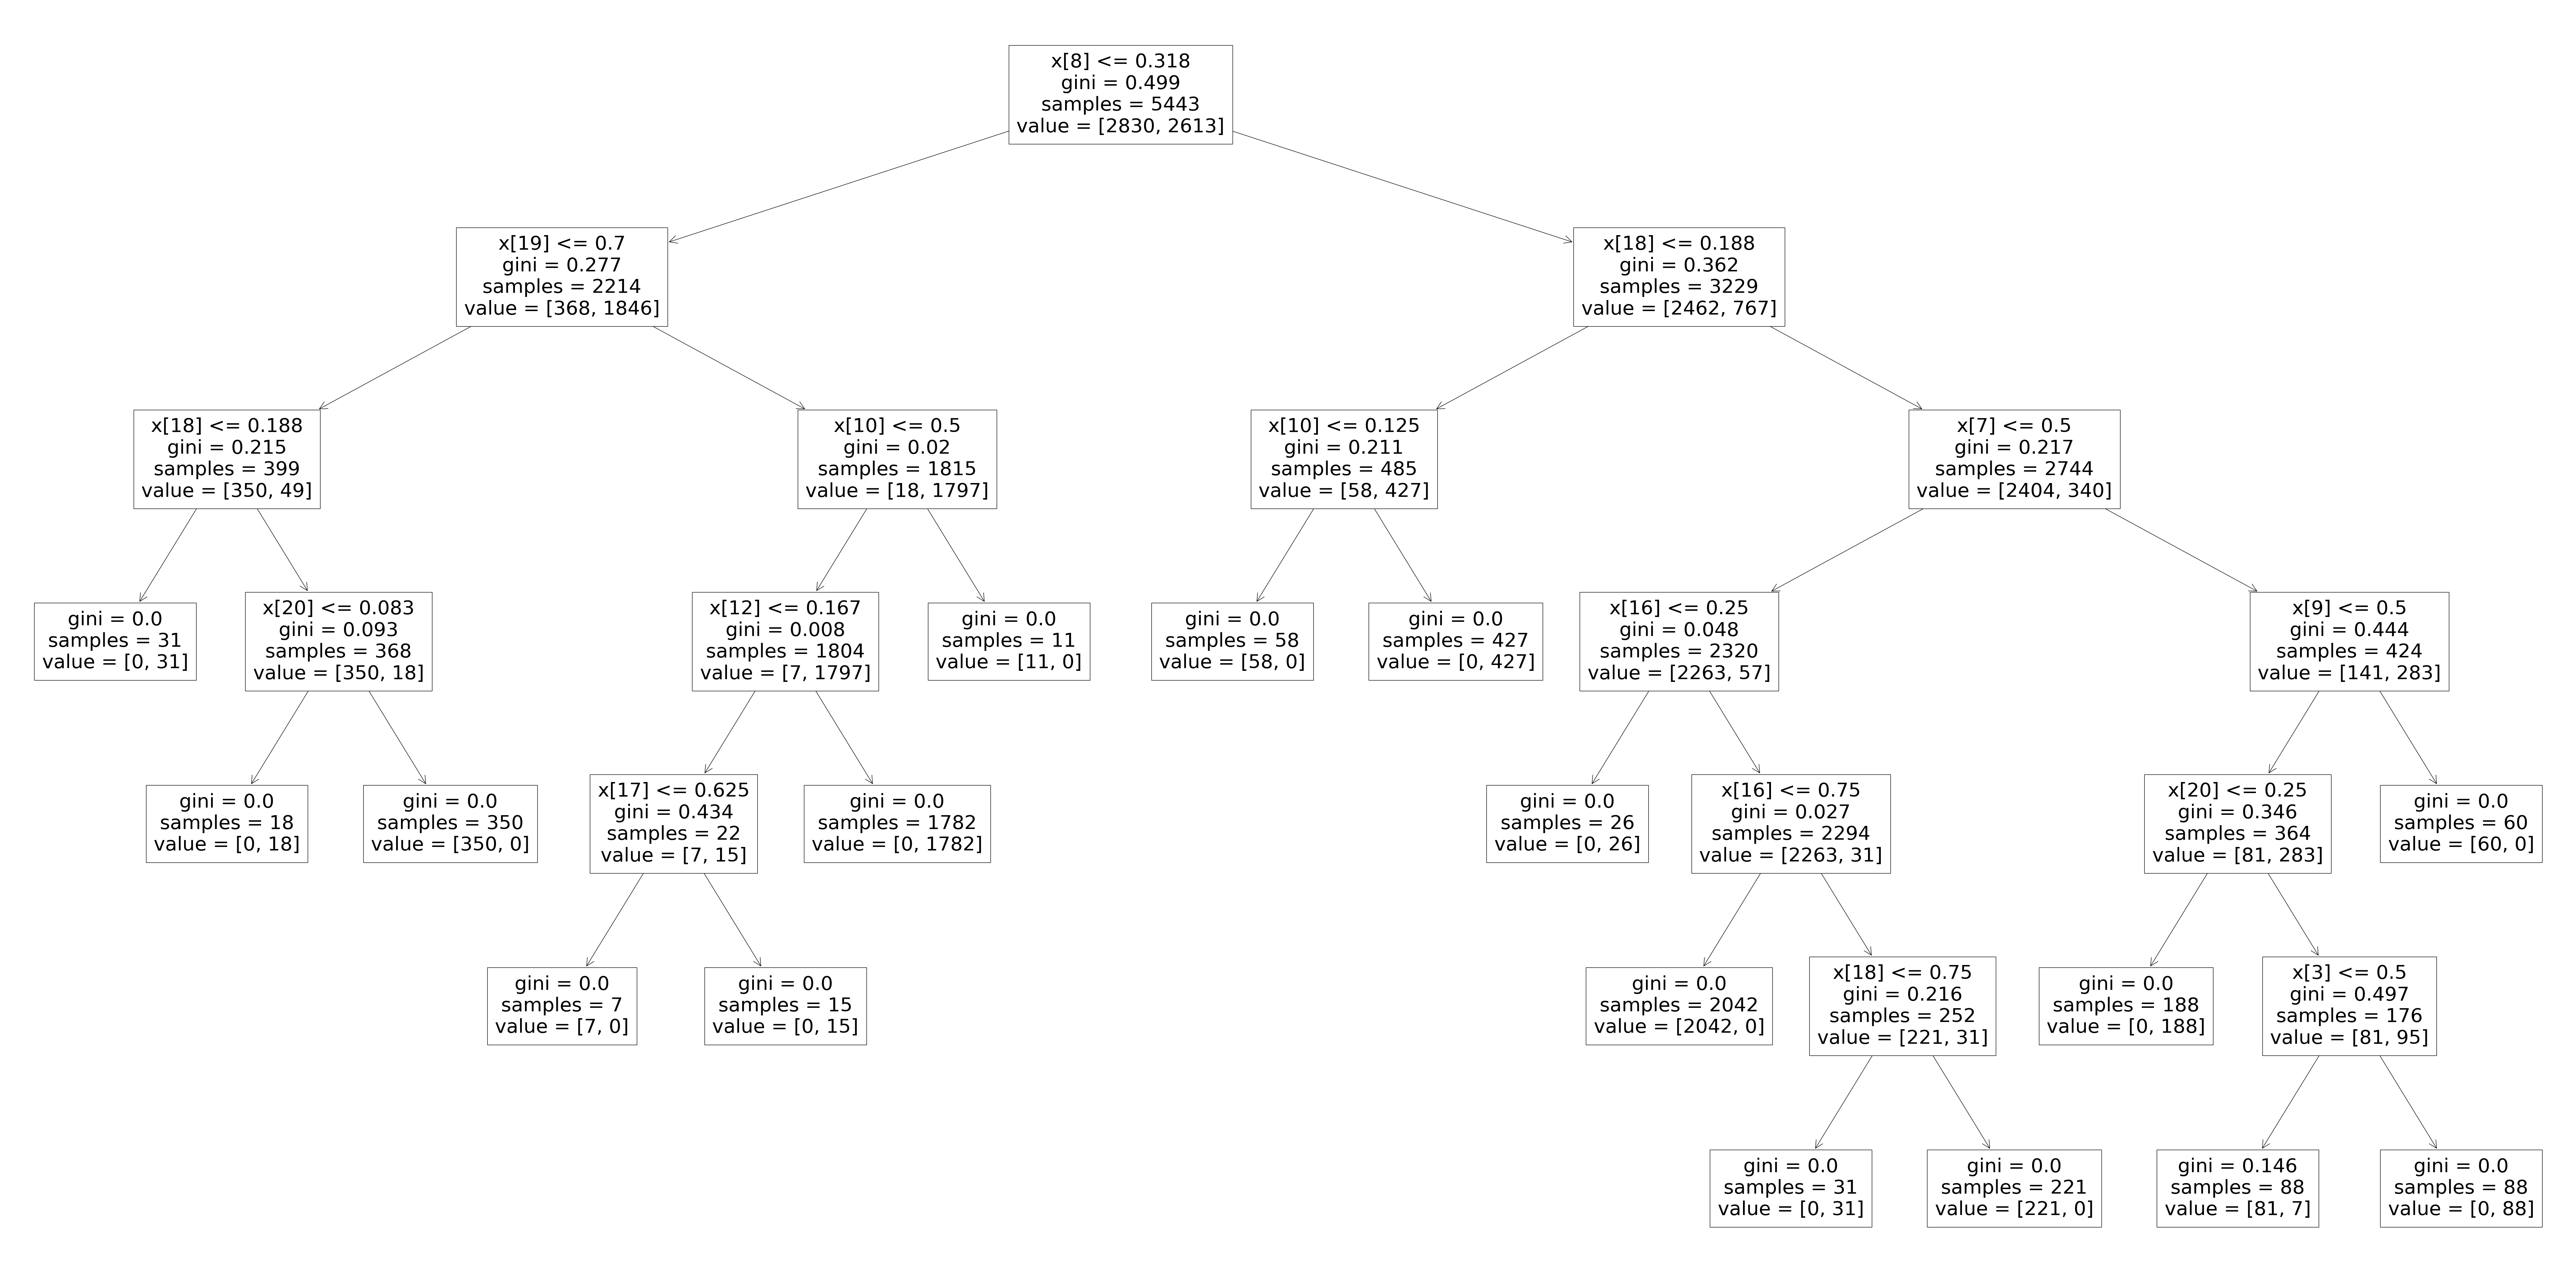

In [23]:
# plotting the splits
import matplotlib.pyplot as plt

plt.figure(figsize=(96,48))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

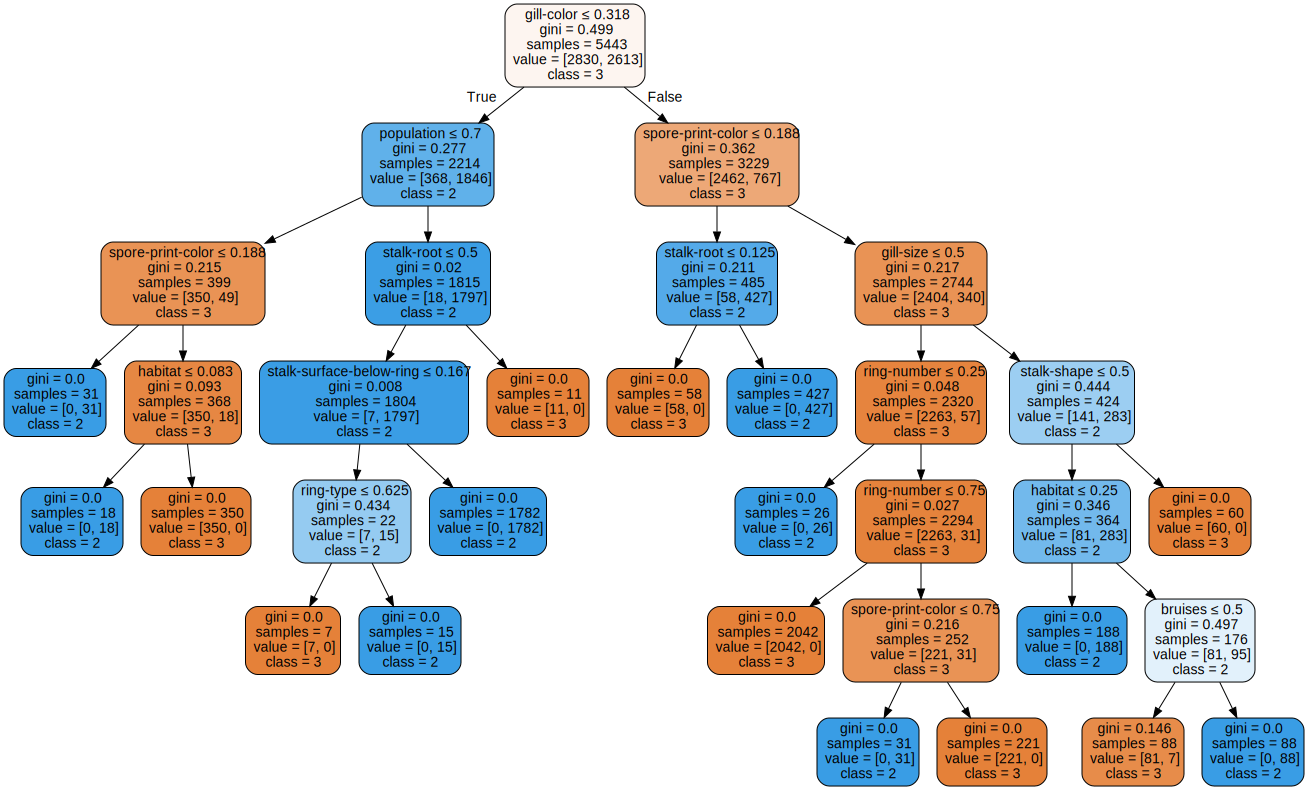

In [24]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [25]:
# Save the figure for future reference
graph.render(filename='cart',directory='/content/')

'/content/cart.pdf'

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1378    0]
 [   1 1302]]


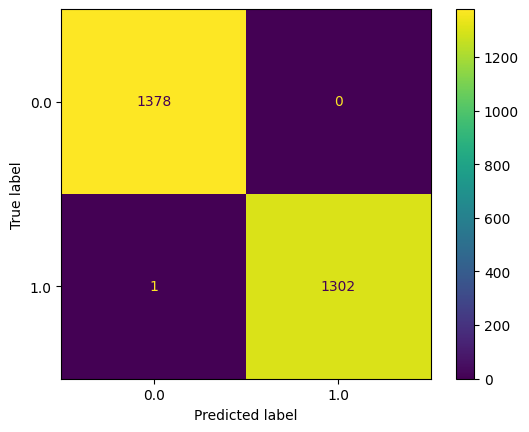

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot()

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/cart_confusion_matrix.png')

## **Support and Confidence**

The **support** of the decision rule refers to the proportion of records in the dataset that rest in that particular terminal leaf node.The **confidence** of the rule refers to the proportion of records in the leaf nodefor which the decision rule is true.

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1378
         1.0       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



# **Decision Tree - C4.5**

In [29]:
# setting maximum depth of the decision tree to be level 3 with randomly chosen samples in the training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [30]:
# Getting some predictions from the testing set
y_pred_en = clf_en.predict(X_test)

In [31]:
y_pred_en

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
# Getting some predictions from the training set
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0., 1., 0., ..., 0., 1., 0.])

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [34]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.27941176470588236, 0.9375, 'x[8] <= 0.045\nentropy = 0.999\nsamples = 5443\nvalue = [2830, 2613]'),
 Text(0.22058823529411764, 0.8125, 'entropy = 0.0\nsamples = 1167\nvalue = [0, 1167]'),
 Text(0.3382352941176471, 0.8125, 'x[18] <= 0.188\nentropy = 0.923\nsamples = 4276\nvalue = [2830, 1446]'),
 Text(0.11764705882352941, 0.6875, 'x[10] <= 0.125\nentropy = 0.32\nsamples = 1118\nvalue = [65, 1053]'),
 Text(0.058823529411764705, 0.5625, 'entropy = 0.0\nsamples = 65\nvalue = [65, 0]'),
 Text(0.17647058823529413, 0.5625, 'entropy = 0.0\nsamples = 1053\nvalue = [0, 1053]'),
 Text(0.5588235294117647, 0.6875, 'x[7] <= 0.5\nentropy = 0.542\nsamples = 3158\nvalue = [2765, 393]'),
 Text(0.29411764705882354, 0.5625, 'x[18] <= 0.562\nentropy = 0.18\nsamples = 2686\nvalue = [2613, 73]'),
 Text(0.23529411764705882, 0.4375, 'entropy = 0.0\nsamples = 2226\nvalue = [2226, 0]'),
 Text(0.35294117647058826, 0.4375, 'x[10] <= 0.125\nentropy = 0.631\nsamples = 460\nvalue = [387, 73]'),
 Text(0.294117

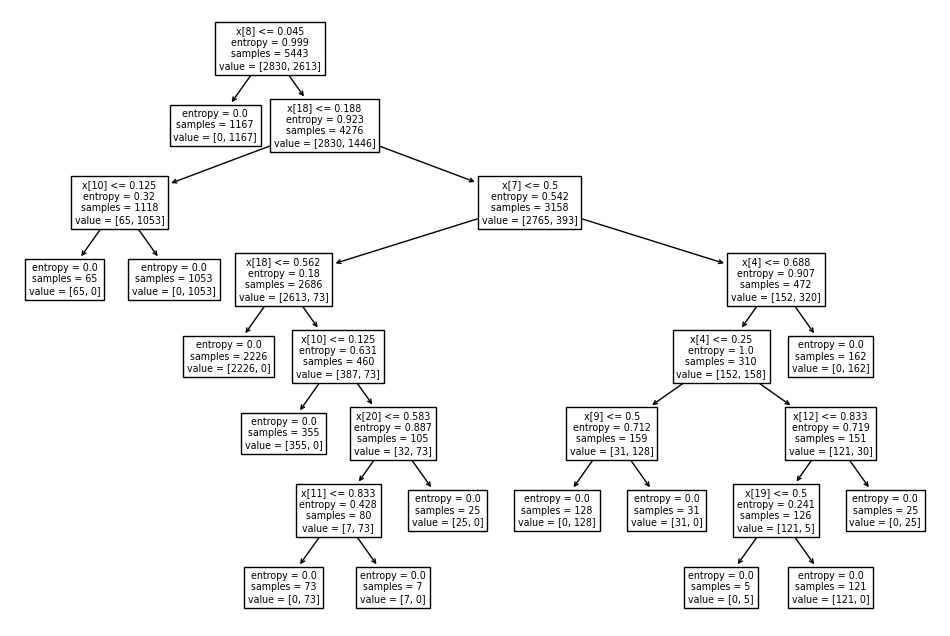

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

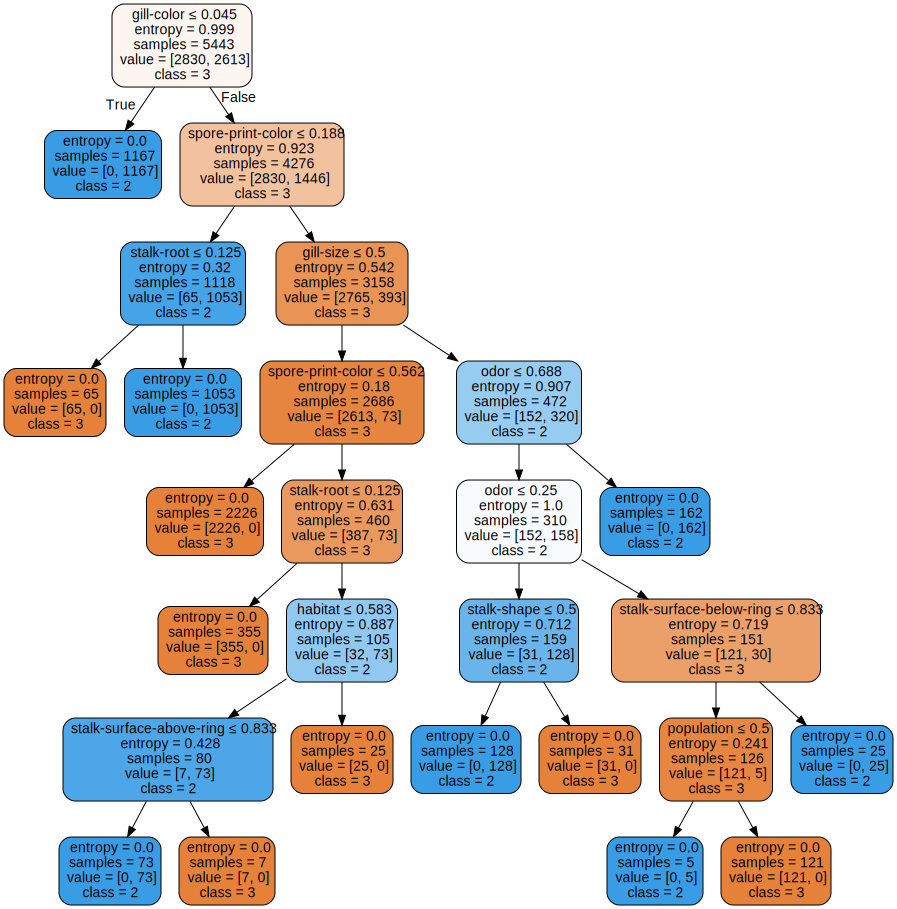

In [36]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [37]:
# Save the figure for future reference
graph.render(filename='C4.5.dot',directory='/content/drive/MyDrive/CSI 382 - Datasets/')

'/content/drive/MyDrive/CSI 382 - Datasets/C4.5.dot.pdf'

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1378    0]
 [   0 1303]]


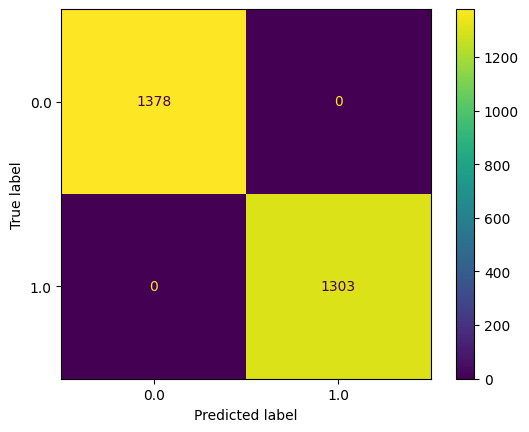

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_en.classes_)
disp.plot()

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/cart_confusion_matrix.png')

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1378
         1.0       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

